In [110]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [115]:
stk_data = pd.read_csv('BTC-USD.csv')
# df = pdd.DataReader('AAPL', data-source='yahoo', start = '2014-09-25', end = '2021-08-25')
# stk_data = web.get_data_yahoo('BTC-USD', start = '2014/09/25', end = '2021-08-25')
stk_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3101,15-03-2023,24770.925780,25240.615230,23964.910160,24375.960940,24375.960940,4.365570e+10
3102,16-03-2023,24373.457030,25190.326170,24225.111330,25052.789060,25052.789060,3.386606e+10
3103,17-03-2023,25055.123050,27787.812500,24955.169920,27423.929690,27423.929690,5.073026e+10
3104,18-03-2023,27448.117190,27725.953130,26636.261720,26965.878910,26965.878910,3.572304e+10


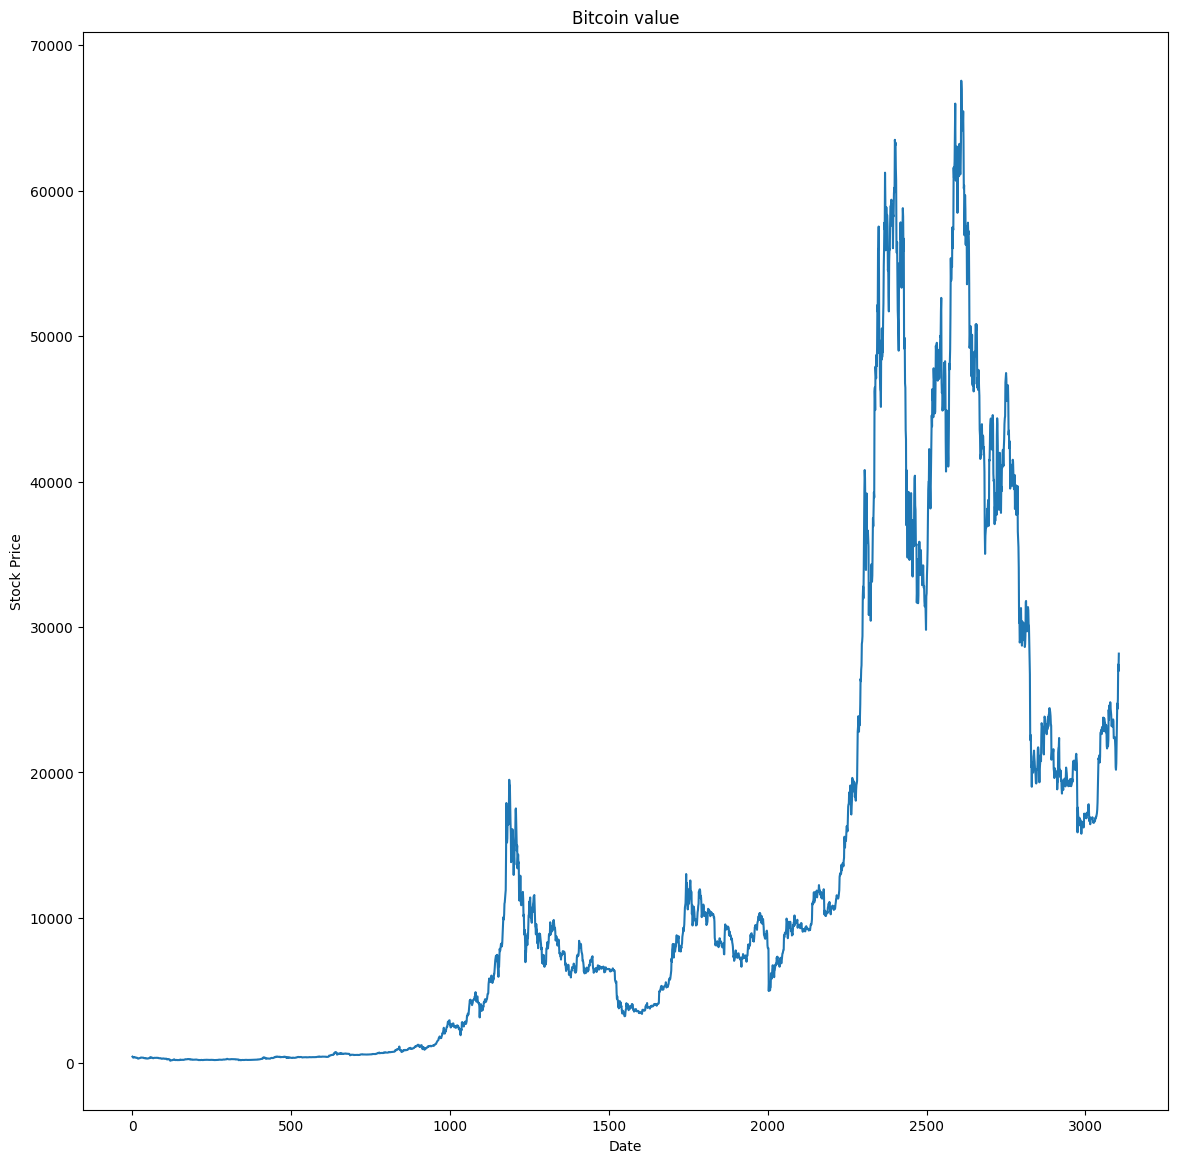

In [116]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Bitcoin value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [117]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [118]:
#normalization
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [119]:
#building LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [120]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
45/45 [==============================] - 10s 23ms/step - loss: 7.0818e-04
Epoch 2/60
45/45 [==============================] - 1s 21ms/step - loss: 2.5268e-04
Epoch 3/60
45/45 [==============================] - 1s 23ms/step - loss: 2.3236e-04
Epoch 4/60
45/45 [==============================] - 1s 22ms/step - loss: 2.4906e-04
Epoch 5/60
45/45 [==============================] - 1s 21ms/step - loss: 2.2798e-04
Epoch 6/60
45/45 [==============================] - 2s 34ms/step - loss: 2.1025e-04
Epoch 7/60
45/45 [==============================] - 2s 34ms/step - loss: 1.9192e-04
Epoch 8/60
45/45 [==============================] - 1s 27ms/step - loss: 1.8199e-04
Epoch 9/60
45/45 [==============================] - 1s 29ms/step - loss: 1.8156e-04
Epoch 10/60
45/45 [==============================] - 1s 23ms/step - loss: 1.4856e-04
Epoch 11/60
45/45 [==============================] - 1s 26ms/step - loss: 1.4902e-04
Epoch 12/60
45/45 [==============================] - 1s 25ms/step - loss:

In [132]:

testdataframe = pd.read_csv('BTC-USD_test.csv')
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 366):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [133]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 0s 8ms/step


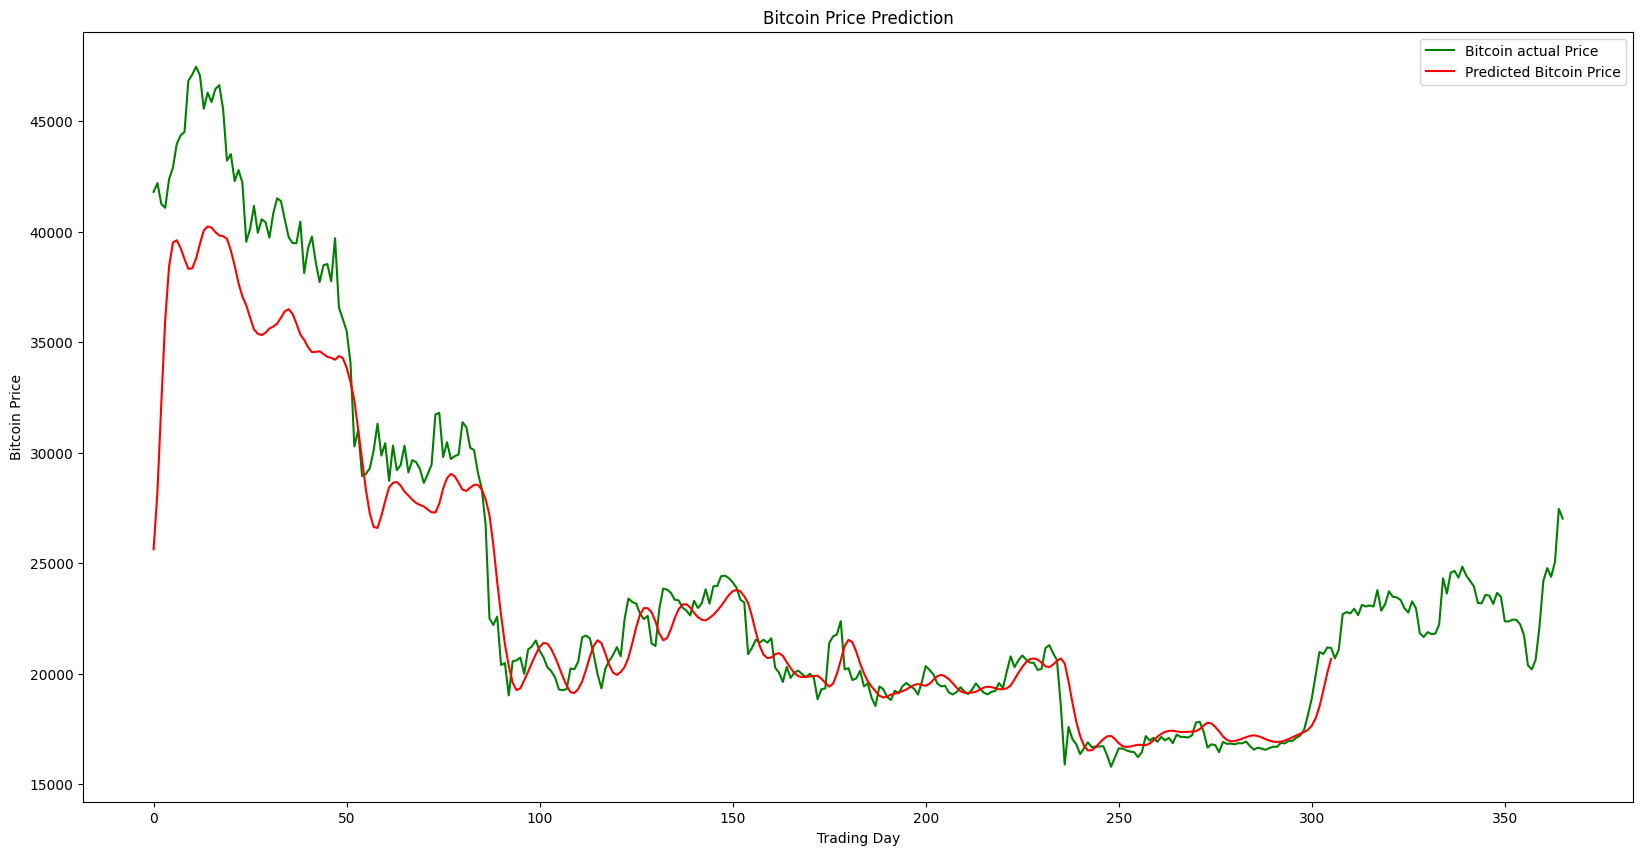

In [134]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Bitcoin actual Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [135]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_stock_price[:-60], predicted_stock_price)
print("MSE: {:.2f}".format(mse))
from sklearn.metrics import r2_score
r2 = r2_score(real_stock_price[:-60], predicted_stock_price)
print("R-Squared Score: {:.2f}".format(r2))


MSE: 6976886.88
R-Squared Score: 0.91
